In [1]:
#import libraries
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
#keys
api_key = os.environ.get('YOUTUBE_API_KEY')
channel_ids = ["UCoOae5nYA7VqaXzerajD0lg"]

In [4]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [5]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()
    
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
    return(pd.DataFrame(all_data))

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [7]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Ali Abdaal,5650000,432662034,966,UUoOae5nYA7VqaXzerajD0lg


In [8]:
playlist_id = 'UUoOae5nYA7VqaXzerajD0lg'
def get_video_ids(youtube, playlist_id):
    
    video_ids=[]
    
    request = youtube.playlistItems().list(
        part="snippet, contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
             part="contentDetails",
             playlistId=playlist_id,
             maxResults = 50,
             pageToken = next_page_token)
        response = request.execute()
        
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token = response.get('nextPageToken')
    return video_ids  

In [9]:
video_ids=get_video_ids(youtube, playlist_id)

In [10]:
len(video_ids)

963

In [11]:
def get_video_details(youtube, video_ids):
    all_video_info =[]
    
    for i in range (0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i: i+50])
        )
        response = request.execute()
        
        for video  in response['items']:
            stats_to_keep = {'snippet':['channelTitle', 'title', 'description','publishedAt','categoryId'],
                             'statistics': ['viewCount','likeCount','commentCount'],
                             'contentDetails': ['duration']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v]= video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    return pd.DataFrame(all_video_info)

In [12]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,publishedAt,categoryId,viewCount,likeCount,commentCount,duration
0,kxBs0Vr1aJ0,Ali Abdaal,How to guarantee you regret your life,"Join Sunday Snippets, my weekly email where I ...",2024-07-05T13:00:54Z,27,3022,339,63,PT7M33S
1,6cSI6b6qPSg,Ali Abdaal,How to Prevent Burnout 🔥,Check out my New York Times bestselling book a...,2024-07-05T12:00:05Z,27,1303,207,5,PT53S
2,6P5zJv5qzxU,Ali Abdaal,Why To-Do Lists Are Ruining Your Workflow ✅,Check out my New York Times bestselling book a...,2024-07-04T12:00:11Z,27,12452,1168,13,PT47S
3,kZtUOrxw9FU,Ali Abdaal,"Lower the Stakes, Perform Better 😎",Check out my New York Times bestselling book a...,2024-07-03T12:00:47Z,27,8848,645,10,PT29S
4,IVCCqNpORj0,Ali Abdaal,The Power of Saying No ❌,Check out my New York Times bestselling book a...,2024-07-02T12:00:26Z,27,10804,755,4,PT37S
...,...,...,...,...,...,...,...,...,...,...
958,7APfFjfnNBc,Ali Abdaal,Payphone (Maroon 5) - Katherine Macfarland & A...,"First cover of 2017! We both love this song, s...",2017-01-04T23:13:51Z,27,96336,2325,149,PT2M35S
959,gBpBLTSCb4s,Ali Abdaal,6med UKCAT Crash Course - In a Nutshell,The 6med UKCAT Crash Course is the most effect...,2016-05-09T18:45:18Z,27,17341,132,6,PT2M11S
960,Va0tSdPADpA,Ali Abdaal,6med BMAT Crash Course - In a Nutshell,The 6med BMAT Crash Course is the most effecti...,2016-04-27T09:04:49Z,27,42320,305,10,PT2M18S
961,XJHM0fEH3ss,Ali Abdaal,Rolling in the Deep (Adele) - Duranka Perera &...,Our first 'proper' video! One of our all-time ...,2016-04-05T09:05:29Z,10,65753,793,40,PT2M29S


In [13]:
video_df.isnull().sum()

video_id        0
channelTitle    0
title           0
description     0
publishedAt     0
categoryId      0
viewCount       0
likeCount       0
commentCount    0
duration        0
dtype: int64

In [14]:
# video_df.drop(['tags','favouriteCount','caption','categoryId'], axis = 1, inplace =True)

In [15]:
video_df.dtypes

video_id        object
channelTitle    object
title           object
description     object
publishedAt     object
categoryId      object
viewCount       object
likeCount       object
commentCount    object
duration        object
dtype: object

In [16]:
numeric_cols = ['viewCount','categoryId','likeCount','commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [17]:
from dateutil import parser
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishedDay'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))
video_df['publishedYear'] = pd.to_datetime(video_df['publishedAt']).dt.year

In [18]:
video_df['publishedTime'] = pd.to_datetime(video_df['publishedAt']).dt.hour
def categorize_by_time(hour):
    if 5<= hour <12:
        return 'Morning'
    elif 12 <= hour <17:
        return 'Afternoon'
    elif 17 <= hour <21:
        return 'Evening'
    else:
        return "Night"
video_df['timeOfDay'] = video_df['publishedTime'].apply(categorize_by_time)

In [19]:
import isodate
video_df['durationMins'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationMins'] =(video_df['durationMins'].apply(lambda x: x.total_seconds()))/60

In [20]:
video_df.head()

,video_id,channelTitle,title,description,publishedAt,categoryId,viewCount,likeCount,commentCount,duration,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins
0,kxBs0Vr1aJ0,Ali Abdaal,How to guarantee you regret your life,"Join Sunday Snippets, my weekly email where I ...",2024-07-05 13:00:54+00:00,27,3022,339,63,PT7M33S,Friday,2024,13,Afternoon,7.550000
1,6cSI6b6qPSg,Ali Abdaal,How to Prevent Burnout 🔥,Check out my New York Times bestselling book a...,2024-07-05 12:00:05+00:00,27,1303,207,5,PT53S,Friday,2024,12,Afternoon,0.883333
2,6P5zJv5qzxU,Ali Abdaal,Why To-Do Lists Are Ruining Your Workflow ✅,Check out my New York Times bestselling book a...,2024-07-04 12:00:11+00:00,27,12452,1168,13,PT47S,Thursday,2024,12,Afternoon,0.783333
3,kZtUOrxw9FU,Ali Abdaal,"Lower the Stakes, Perform Better 😎",Check out my New York Times bestselling book a...,2024-07-03 12:00:47+00:00,27,8848,645,10,PT29S,Wednesday,2024,12,Afternoon,0.483333
4,IVCCqNpORj0,Ali Abdaal,The Power of Saying No ❌,Check out my New York Times bestselling book a...,2024-07-02 12:00:26+00:00,27,10804,755,4,PT37S,Tuesday,2024,12,Afternoon,0.616667


In [21]:
def categorize_by_duration(duration):
    if duration < 1:
        return 'shorts'
    else:
        return 'video'
    
video_df['videoType'] = video_df['durationMins'].apply(categorize_by_duration)

In [22]:
# categories = {
#     'Crime': ['болсон явдал'],
#     'Review': ['unboxing','review','bought','авсан','амттан','snacks','зарлагатай','сард'],
#     'Howto': ['youtube', "what's", 'skincare'],
#     'Trendy':['single']
# }
# def categorize_by_content(title):
#     title = title.lower()
#     for category, keywords in categories.items():
#         if any(keyword in title for keyword in keywords):
#             return category
#     return 'Vlog'
# video_df['category'] = video_df['title'].apply(categorize_by_content)

In [23]:
video_df.sample(7)

,video_id,channelTitle,title,description,publishedAt,categoryId,viewCount,likeCount,commentCount,duration,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins,videoType
624,RBcEpsTmT8Y,Ali Abdaal,How To Beat Imposter Syndrome,"To improve your thinking and learning skills, ...",2021-01-31 17:14:45+00:00,27,366209,20804,8434,PT12M55S,Sunday,2021,17,Evening,12.916667,video
355,JMh44cq60UE,Ali Abdaal,7 Surprising Habits to Be a Millionaire by 30,Sign up to Morning Brew for free today: https:...,2023-04-08 12:00:21+00:00,27,540665,26791,548,PT11M47S,Saturday,2023,12,Afternoon,11.783333,video
192,yQXjNQnO9EI,Ali Abdaal,The 12 Month Celebration 🥳,"📚 If you liked this, you might like my new boo...",2023-12-17 14:00:41+00:00,27,32780,1713,10,PT25S,Sunday,2023,14,Afternoon,0.416667,shorts
942,MhUljoWSzSk,Ali Abdaal,WE HAVE A COOL NAME | Medical Students Making ...,📚 Pre-order my book to get an exclusive ticket...,2017-07-28 10:29:53+00:00,22,8089,109,3,PT4M14S,Friday,2017,10,Morning,4.233333,video
243,Lmkjr3AOTmk,Ali Abdaal,One of the best books I've ever read about bus...,📚 Check out my new book Feel-Good Productivity...,2023-10-11 12:00:24+00:00,27,48948,3311,22,PT32S,Wednesday,2023,12,Afternoon,0.533333,shorts
720,FdSF4OfQ9f0,Ali Abdaal,I WAS WRONG - iPad Pro 11 vs. 12.9 inch,📚 Pre-order my book to get an exclusive ticket...,2020-04-09 15:00:05+00:00,27,2474977,40410,3010,PT14M57S,Thursday,2020,15,Afternoon,14.950000,video
187,safNI7BcYZ8,Ali Abdaal,Do you ever make this calendar mistake? 😅,📚 This is an extract from my new book Feel-Goo...,2023-12-21 16:44:11+00:00,27,27162,1588,7,PT46S,Thursday,2023,16,Afternoon,0.766667,shorts


In [24]:
video_df.drop(['description', 'publishedAt','duration'], axis =1, inplace =True)
video_df.head(2)

,video_id,channelTitle,title,categoryId,viewCount,likeCount,commentCount,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins,videoType
0,kxBs0Vr1aJ0,Ali Abdaal,How to guarantee you regret your life,27,3022,339,63,Friday,2024,13,Afternoon,7.550000,video
1,6cSI6b6qPSg,Ali Abdaal,How to Prevent Burnout 🔥,27,1303,207,5,Friday,2024,12,Afternoon,0.883333,shorts


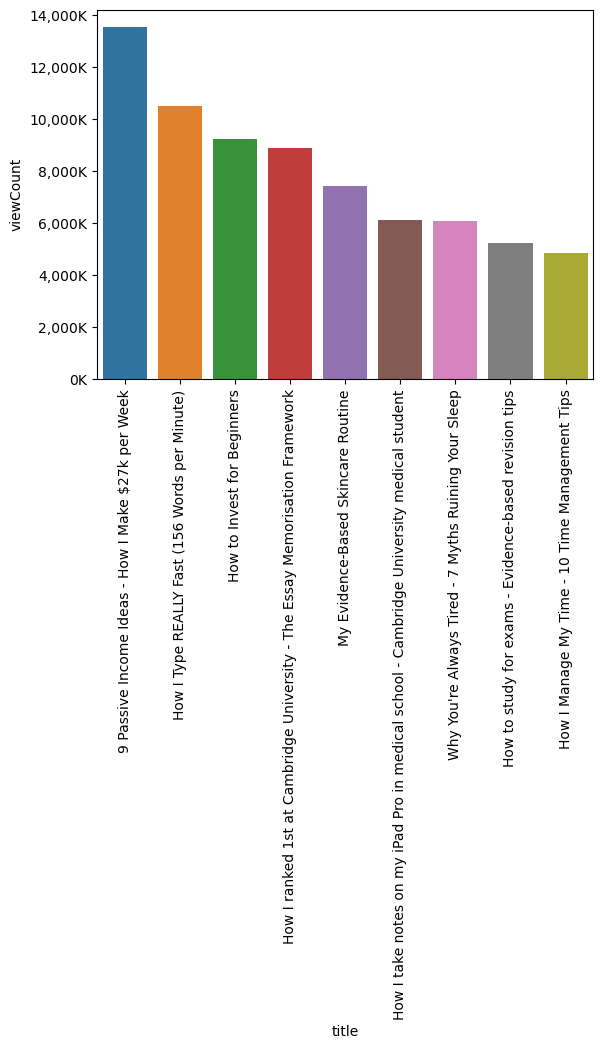

In [25]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
plt.show()

C:\Users\Nomundari\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


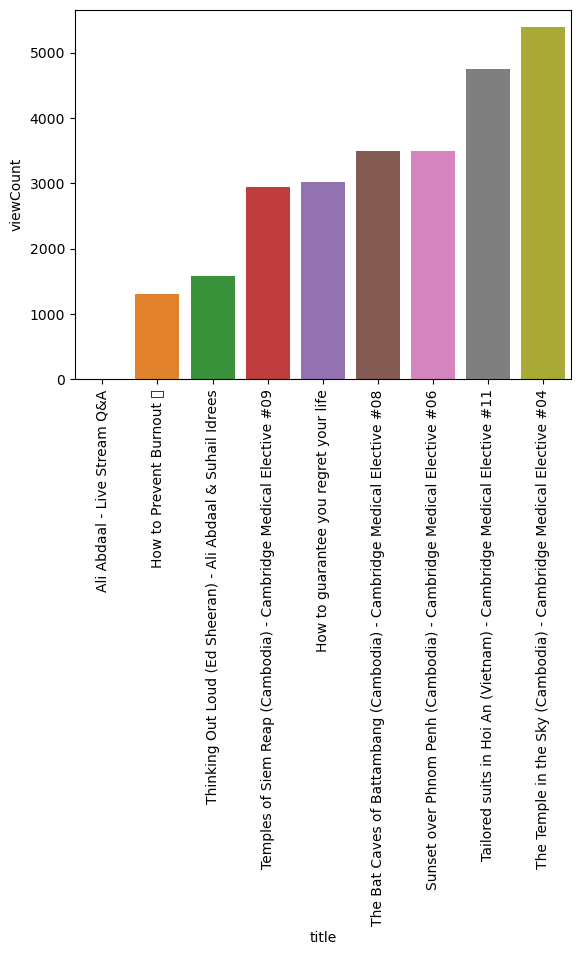

In [26]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

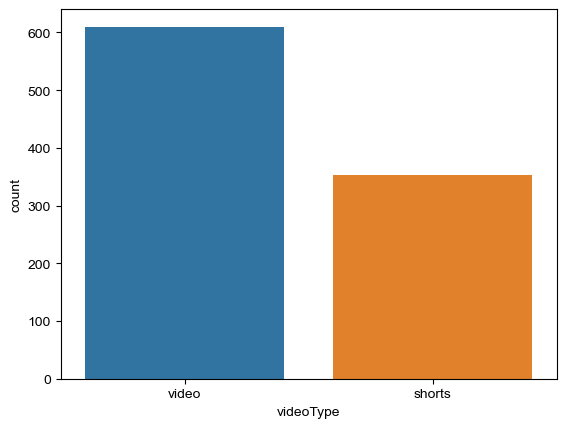

In [27]:
sns.countplot(x = 'videoType', data = video_df)
sns.set_style('whitegrid')

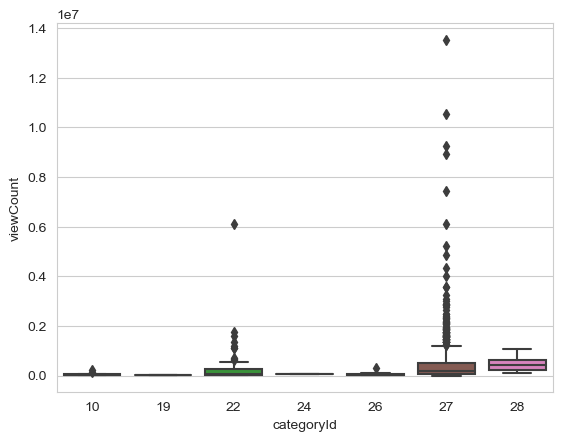

In [28]:
sns.boxplot(x = 'categoryId', y='viewCount', data = video_df)
sns.set_style('whitegrid')

Text(0, 0.5, 'View Count')

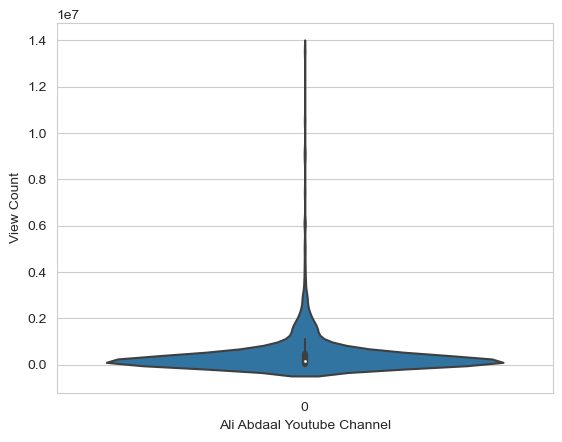

In [29]:
sns.violinplot(video_df['viewCount'])
plt.xlabel('Ali Abdaal Youtube Channel')
plt.ylabel('View Count')

<Axes: xlabel='publishedDay', ylabel='count'>

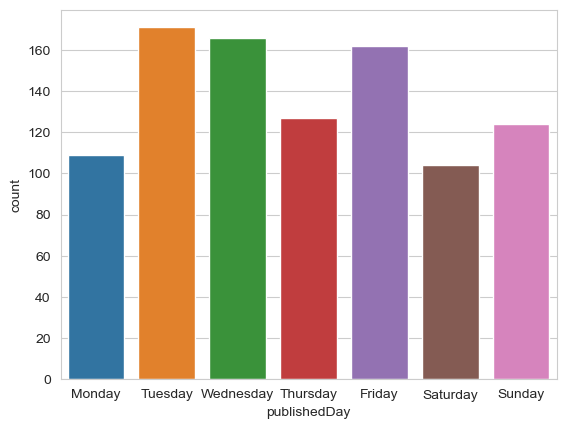

In [30]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='publishedDay', data = video_df, order =days_order)

<Axes: xlabel='publishedDay', ylabel='viewCount'>

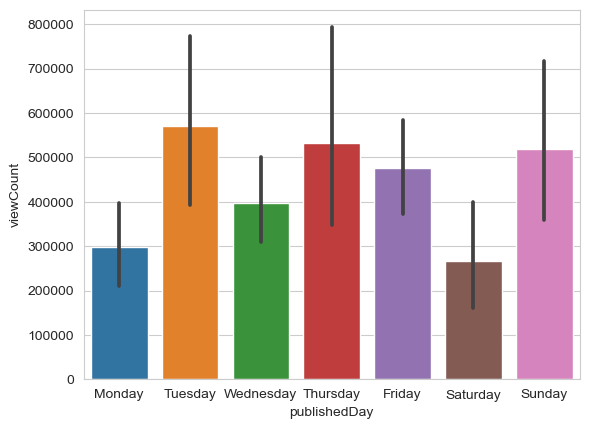

In [31]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='publishedDay',y= 'viewCount', data = video_df, order =days_order)

<Axes: xlabel='publishedYear', ylabel='count'>

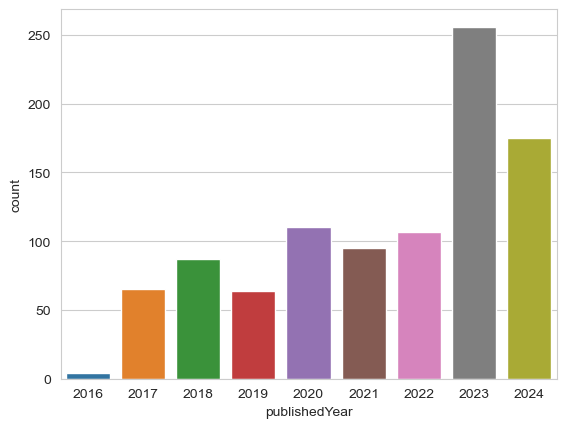

In [32]:
sns.countplot(x='publishedYear', data = video_df)

<Axes: xlabel='publishedTime', ylabel='Count'>

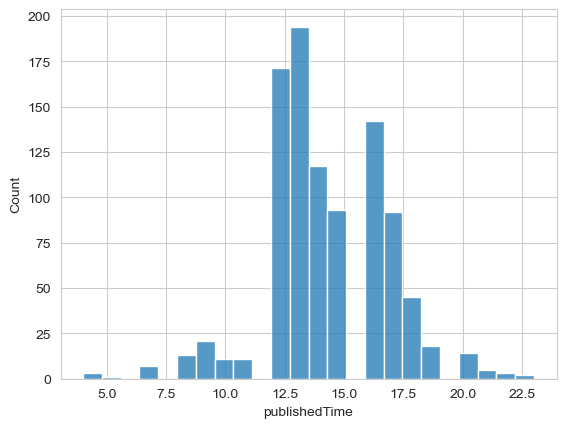

In [33]:
sns.histplot(x = 'publishedTime', data = video_df, bins = 24)

<Axes: xlabel='timeOfDay', ylabel='viewCount'>

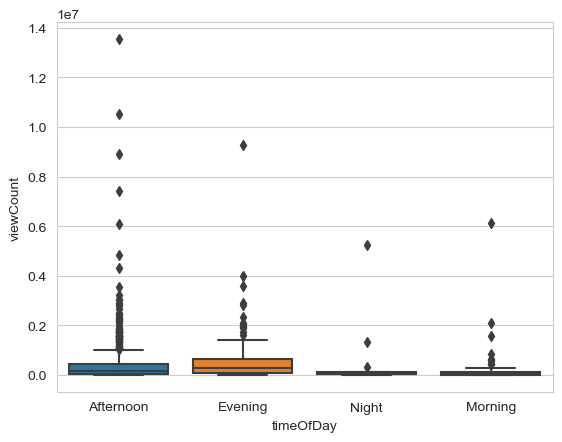

In [34]:
sns.boxplot(x='timeOfDay',y= 'viewCount', data = video_df)

<Axes: xlabel='durationMins', ylabel='Count'>

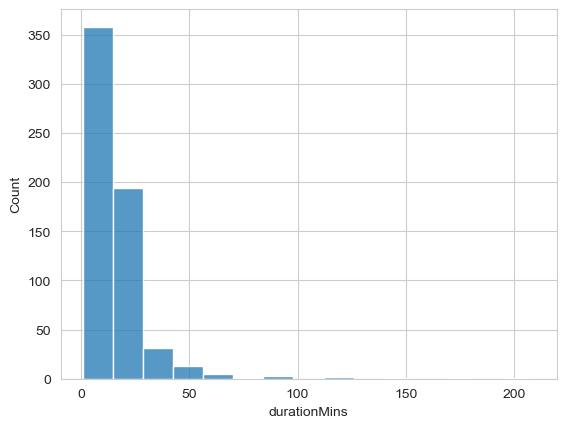

In [35]:
filtered_df = video_df[video_df['videoType'] == 'video']
sns.histplot(x = 'durationMins', data =filtered_df, bins = 15)

<Axes: xlabel='likeCount', ylabel='viewCount'>

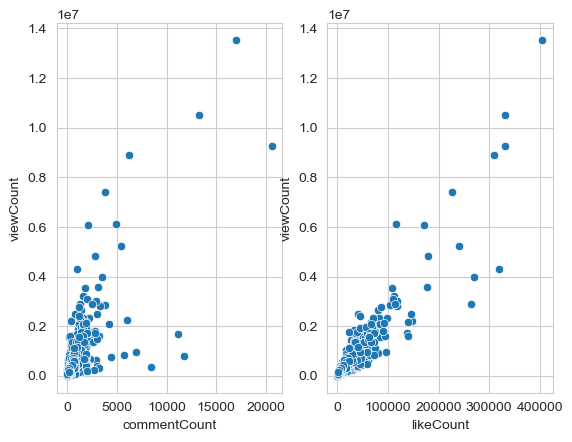

In [36]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(x='commentCount', y = 'viewCount', data = video_df, ax = ax[0])
sns.scatterplot(x='likeCount', y = 'viewCount', data = video_df, ax = ax[1])

<Axes: >

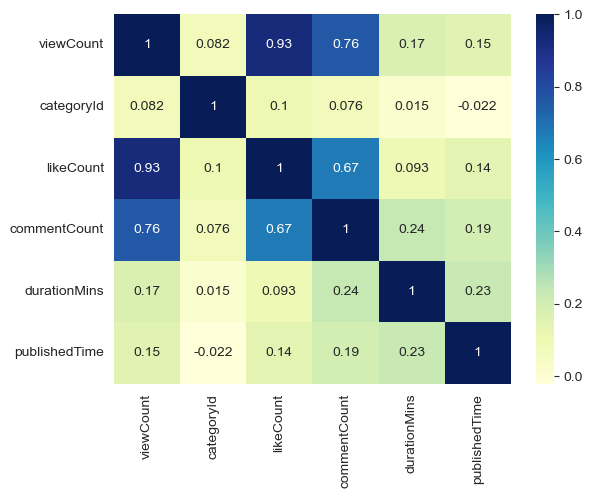

In [37]:
features = ['viewCount','categoryId','likeCount', 'commentCount','durationMins','publishedTime']
sns.heatmap(video_df[features].corr(), cmap="YlGnBu", annot=True) 

In [38]:
video_df.drop(['video_id','channelTitle','title'], axis =1, inplace =True)
video_df.head(3)

,categoryId,viewCount,likeCount,commentCount,publishedDay,publishedYear,publishedTime,timeOfDay,durationMins,videoType
0,27,3022,339,63,Friday,2024,13,Afternoon,7.550000,video
1,27,1303,207,5,Friday,2024,12,Afternoon,0.883333,shorts
2,27,12452,1168,13,Thursday,2024,12,Afternoon,0.783333,shorts


In [39]:
video_df.describe()

,categoryId,viewCount,likeCount,commentCount,publishedYear,publishedTime,durationMins
count,963.000000,9.630000e+02,963.000000,963.000000,963.000000,963.000000,963.000000
mean,26.255452,4.492531e+05,18077.333333,559.261682,2021.379024,14.207684,10.538162
std,2.568229,9.618536e+05,36236.717669,1332.588924,2.246887,2.617402,15.761359
min,10.000000,0.000000e+00,0.000000,0.000000,2016.000000,4.000000,0.000000
25%,27.000000,3.795350e+04,2139.500000,26.000000,2020.000000,13.000000,0.883333
50%,27.000000,1.708110e+05,7490.000000,193.000000,2022.000000,14.000000,6.216667
75%,27.000000,4.624950e+05,18797.000000,646.000000,2023.000000,16.000000,15.233333
max,28.000000,1.353424e+07,405363.000000,20577.000000,2024.000000,23.000000,209.133333


In [40]:
video_df.isna().sum()

categoryId       0
viewCount        0
likeCount        0
commentCount     0
publishedDay     0
publishedYear    0
publishedTime    0
timeOfDay        0
durationMins     0
videoType        0
dtype: int64

In [41]:
# video_df['commentCount']=video_df['commentCount'].fillna(video_df['commentCount'].median())

In [42]:
features = ['publishedDay','timeOfDay']
dummies = pd.get_dummies(video_df[features], drop_first = True)
video_df= pd.concat([video_df,dummies], axis = 1)
video_df.drop(['publishedDay','videoType','timeOfDay','commentCount', 'publishedYear','publishedTime'], axis = 1, inplace = True)

In [43]:
video_df.sample(5)

,categoryId,viewCount,likeCount,durationMins,publishedDay_Monday,publishedDay_Saturday,publishedDay_Sunday,publishedDay_Thursday,publishedDay_Tuesday,publishedDay_Wednesday,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night
422,27,71210,4321,0.983333,False,False,False,False,False,False,False,False,False
881,27,55153,1695,12.333333,False,True,False,False,False,False,False,True,False
952,10,228418,3760,5.800000,False,False,False,False,True,False,False,True,False
485,27,392827,13761,14.716667,False,True,False,False,False,False,False,False,False
288,27,171967,13367,0.983333,True,False,False,False,False,False,False,False,False


In [44]:
video_df.dtypes

categoryId                  int64
viewCount                   int64
likeCount                   int64
durationMins              float64
publishedDay_Monday          bool
publishedDay_Saturday        bool
publishedDay_Sunday          bool
publishedDay_Thursday        bool
publishedDay_Tuesday         bool
publishedDay_Wednesday       bool
timeOfDay_Evening            bool
timeOfDay_Morning            bool
timeOfDay_Night              bool
dtype: object

In [45]:
X = video_df.drop('viewCount', axis =1)

In [46]:
y=video_df['viewCount']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8585113845801534

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits = 5, test_size =0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y, cv = cv)

array([0.7070487 , 0.65845896, 0.84005391, 0.83239344, 0.88655471])

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
#         'random_forest':{
#             'model': RandomForestRegressor(random_state = 10),
#             'params': {
#                 'n_estimators': [100, 200, 300],
#                 'max_features': ['auto', 'sqrt', 'log2'],
#                 'max_depth': [None, 10, 20, 30],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4],
#                 'bootstrap': [True, False]
                    
#             }
#         },
        'ridge':{
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0, 100.0],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
        }
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Nomundari\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Nomundari\anaconda

,model,best_score,best_params
0,linear_regression,0.784902,{}
1,lasso,0.784903,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.713876,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,ridge,0.785046,"{'alpha': 100.0, 'solver': 'auto'}"


In [51]:
# import pickle
# with open ('youtube_model.pickle', 'wb') as f:
#     pickle.dump(lr, f)